In [46]:
import numpy as np
import pandas as pd

data_path = 'input/bike-sharing-demand/'

# 데이터 불러오기
# read_csv에서 parse_dates=["datetime"] 옵션을 주면 datetime 피처가 datetime64[ns] 타입으로 자동 변환됨
train = pd.read_csv(data_path + 'train.csv', parse_dates=["datetime"])
test = pd.read_csv(data_path + 'test.csv', parse_dates=["datetime"])
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [47]:
# 데이터의 크기를 확인
print(train.shape, test.shape)

(10886, 12) (6493, 9)


In [48]:
# 피처 엔지니어링

# datetime 피처를 연, 월, 일, 시간, 분, 초로 분리
for dataset in [train, test]:
    dataset['year'] = dataset['datetime'].dt.year
    dataset['month'] = dataset['datetime'].dt.month
    dataset['day'] = dataset['datetime'].dt.day
    dataset['hour'] = dataset['datetime'].dt.hour
    dataset['minute'] = dataset['datetime'].dt.minute
    dataset['second'] = dataset['datetime'].dt.second
    dataset['dayofweek'] = dataset['datetime'].dt.dayofweek

In [49]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [50]:
# datetime 피처를 삭제
train.drop('datetime', axis=1, inplace=True)
test.drop('datetime', axis=1, inplace=True)

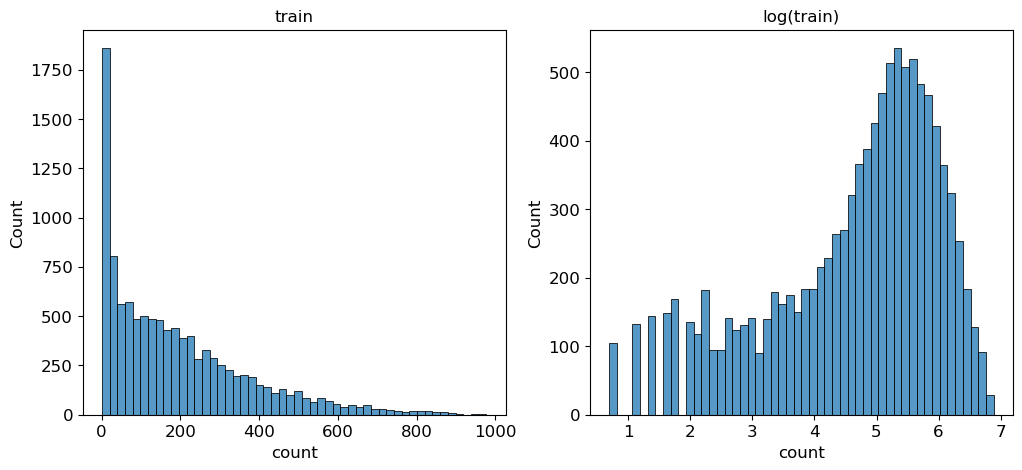

In [63]:
# train 데이터의 count 피처를 로그 변환한 결과를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.histplot(train['count'], bins=50, ax=ax1)
ax1.set(title='train')
sns.histplot(np.log1p(train['count']), bins=50, ax=ax2)
ax2.set(title='log(train)')
plt.show()

[Text(0.5, 1.0, 'Rantal Count by Season')]

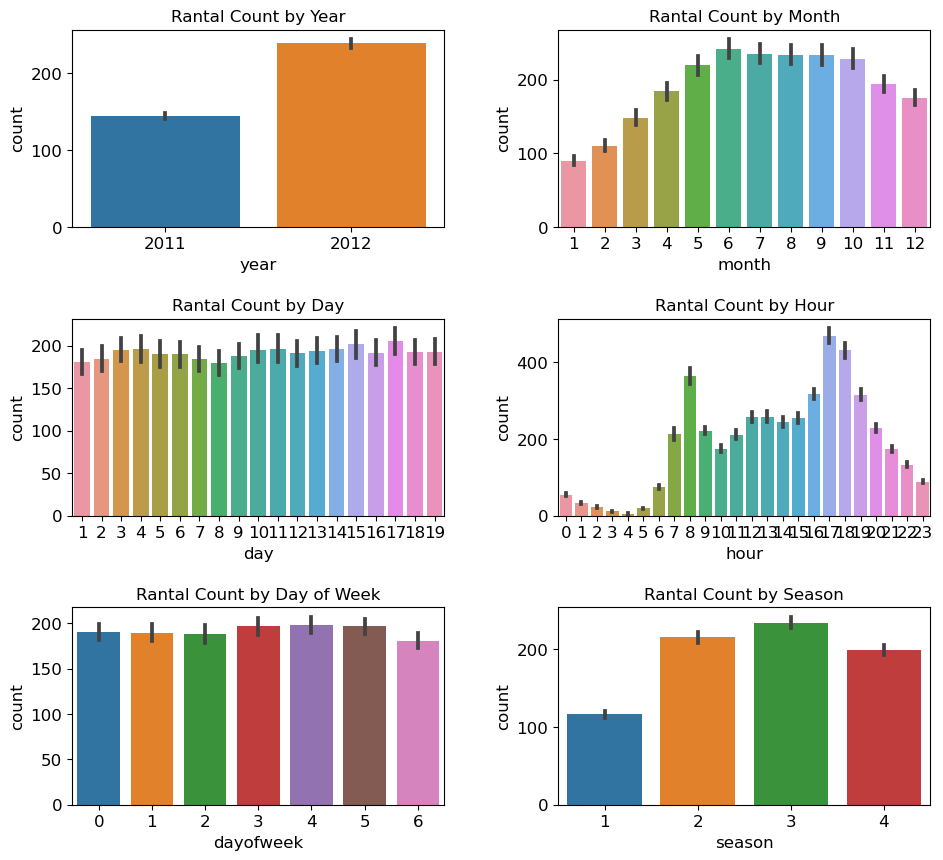

In [61]:
fig, axis = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()

plt.rcParams['font.size'] = 12 # 폰트 크기 설정
plt.rcParams['axes.titlesize'] = 12 # 타이틀 크기 설정
fig.set_size_inches(10, 9) # 사이즈 설정

# 연도별 대여량
sns.barplot(data=train, x='year', y='count', ax=axis[0][0])
# 월별 대여량
sns.barplot(data=train, x='month', y='count', ax=axis[0][1])
# 일별 대여량
sns.barplot(data=train, x='day', y='count', ax=axis[1][0])
# 시간별 대여량
sns.barplot(data=train, x='hour', y='count', ax=axis[1][1])
# 요일별 대여량
sns.barplot(data=train, x='dayofweek', y='count', ax=axis[2][0])
# 계절별 대여량
sns.barplot(data=train, x='season', y='count', ax=axis[2][1])

# 타이틀 추가
axis[0][0].set(title='Rantal Count by Year')
axis[0][1].set(title='Rantal Count by Month')
axis[1][0].set(title='Rantal Count by Day')
axis[1][1].set(title='Rantal Count by Hour')
axis[2][0].set(title='Rantal Count by Day of Week')
axis[2][1].set(title='Rantal Count by Season')



<Axes: xlabel='workingday', ylabel='count'>

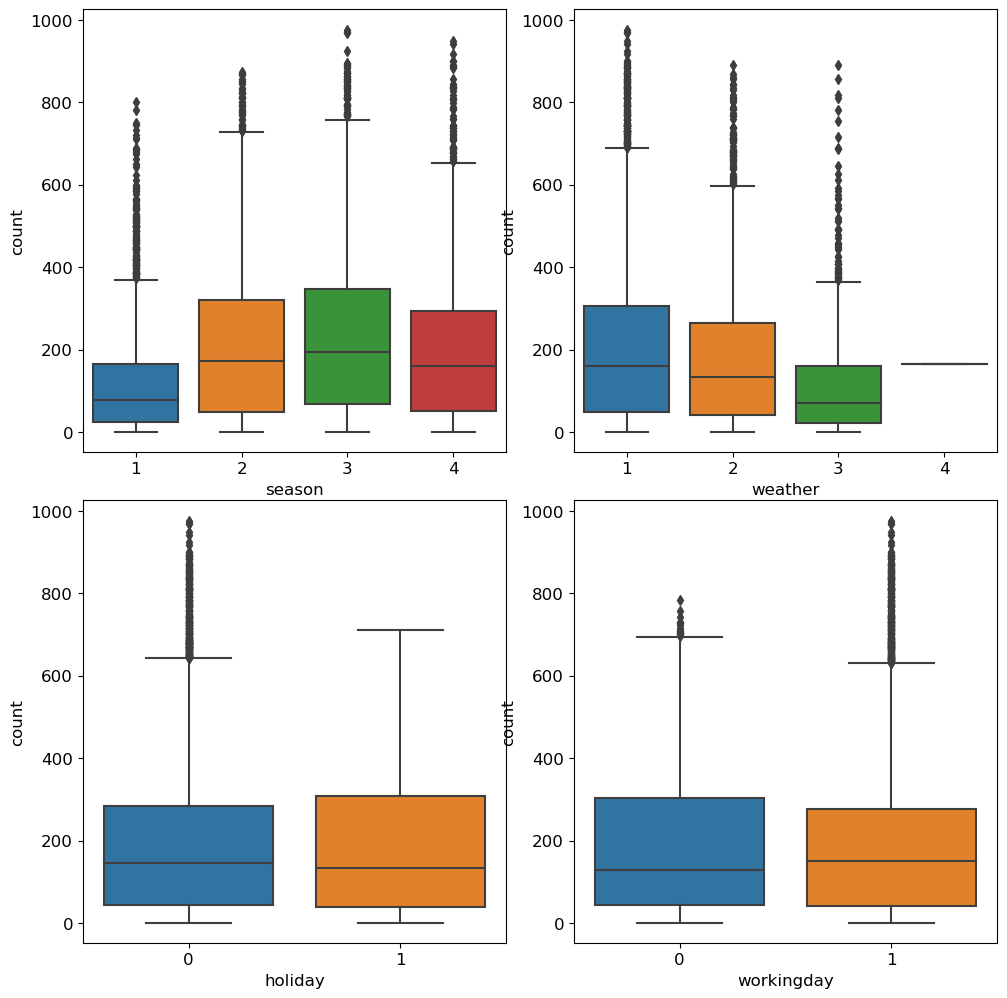

In [62]:
# 2행 2열의 그래프를 그리기 위해 2개의 행렬을 생성
fig, axis = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 10)
fig.tight_layout()

# 계절, 날씨, 휴일, 작업일에 따른 대여량
sns.boxplot(data=train, x='season', y='count', ax=axis[0][0])
sns.boxplot(data=train, x='weather', y='count', ax=axis[0][1])
sns.boxplot(data=train, x='holiday', y='count', ax=axis[1][0])
sns.boxplot(data=train, x='workingday', y='count', ax=axis[1][1])

<Axes: xlabel='hour', ylabel='count'>

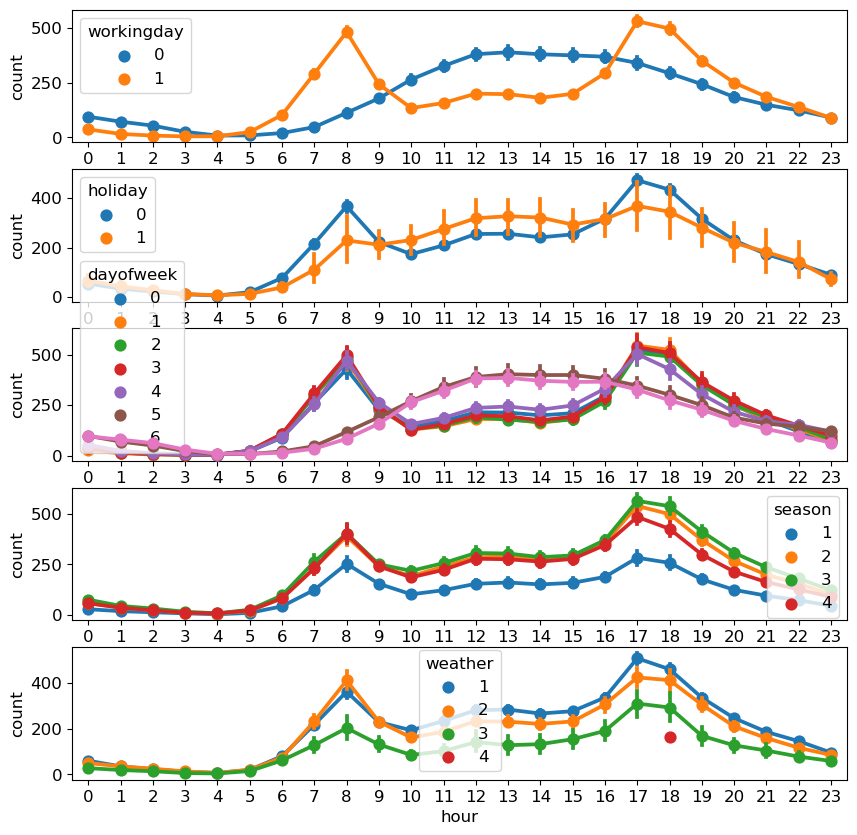

In [54]:
# 5행 1열 그래프를 그리기 위해 5개의 행렬을 생성
fig, axis = plt.subplots(nrows=5, ncols=1)
fig.set_size_inches(10, 10)

# 근무일, 공휴일, 요일, 계절, 날씨에 따른 대여량
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=axis[0])
sns.pointplot(data=train, x='hour', y='count', hue='holiday', ax=axis[1])
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=axis[2])
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=axis[3])
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=axis[4])

<Axes: >

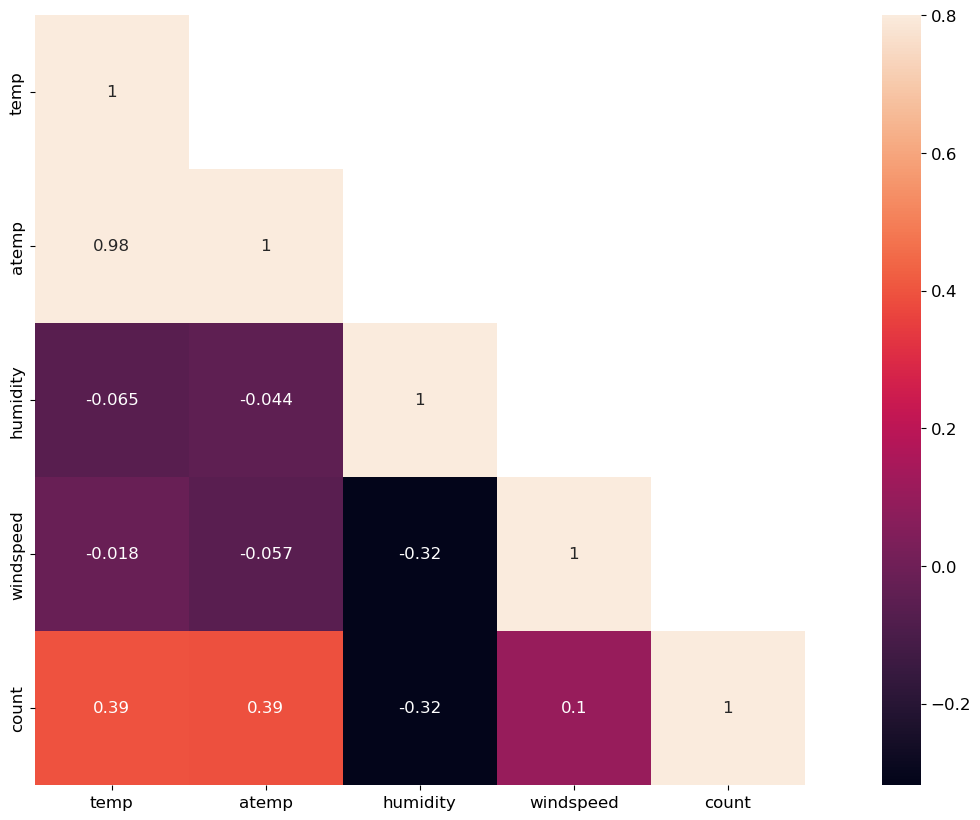

In [68]:
# 피처간 상관관계를 시각화
corrMatt = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
corrMatt = corrMatt.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False # 상삼각행렬만 표시
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

<Axes: xlabel='windspeed', ylabel='count'>

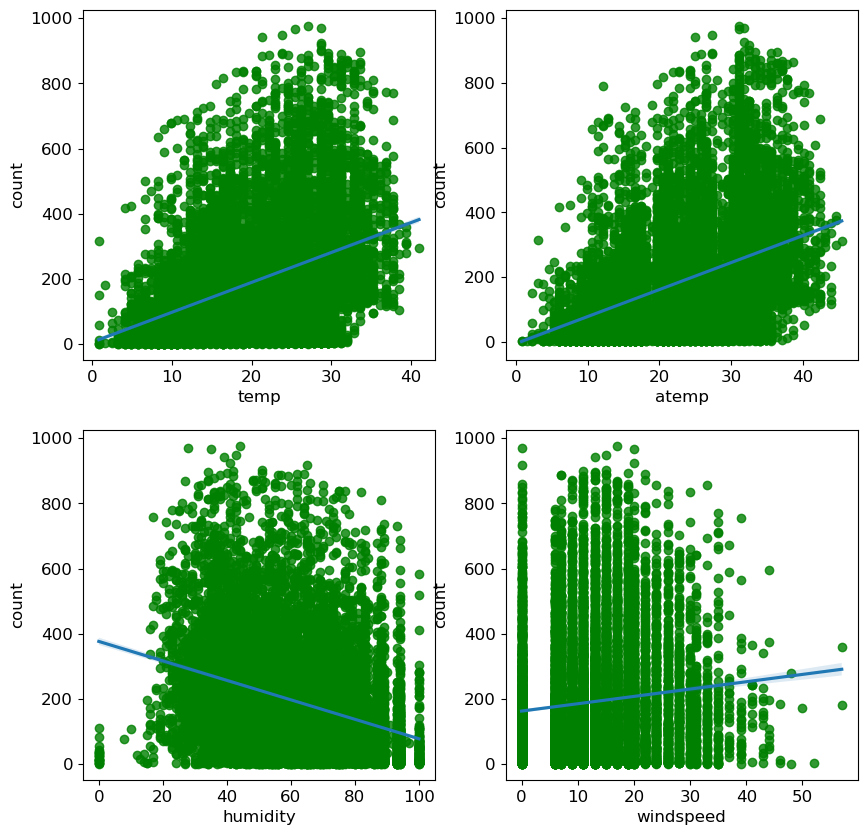

In [59]:
# 2행 2열의 그래프를 그리기 위해 2개의 행렬을 생성
fig, axis = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 10)

# 온도, 체감온도, 습도, 풍속에 따른 대여량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axis[0][0], scatter_kws={'color':'green'})
sns.regplot(x='atemp', y='count', data=train, ax=axis[0][1], scatter_kws={'color':'green'})
sns.regplot(x='humidity', y='count', data=train, ax=axis[1][0], scatter_kws={'color':'green'})
sns.regplot(x='windspeed', y='count', data=train, ax=axis[1][1], scatter_kws={'color':'green'})